In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('clean_irrigation_data.csv')
print(df.head())
print(df.info())

   crop  moisture  Temperature  pump  id  temperature  pressure altitude  \
0     0     638.0         16.0   1.0 NaN          NaN       NaN      NaN   
1     0     522.0         18.0   1.0 NaN          NaN       NaN      NaN   
2     0     741.0         22.0   1.0 NaN          NaN       NaN      NaN   
3     0     798.0         32.0   1.0 NaN          NaN       NaN      NaN   
4     0     690.0         28.0   1.0 NaN          NaN       NaN      NaN   

   soilmiosture  note  ...  Day  Month Year DateTime  DayOfWeek  Season  \
0           NaN   NaN  ...  NaN    NaN  NaN      NaN        NaN  Autumn   
1           NaN   NaN  ...  NaN    NaN  NaN      NaN        NaN  Autumn   
2           NaN   NaN  ...  NaN    NaN  NaN      NaN        NaN  Autumn   
3           NaN   NaN  ...  NaN    NaN  NaN      NaN        NaN  Autumn   
4           NaN   NaN  ...  NaN    NaN  NaN      NaN        NaN  Autumn   

   PumpVoltage  PumpCurrent  IrrigationDuration  Energy_Consumption  
0          220        

In [3]:
print(df.describe())
print(df.isnull().sum())

              crop     moisture  Temperature        pump           id  \
count  7389.000000   200.000000  7389.000000  200.000000  4688.000000   
mean      0.972933   633.085000    27.750000    0.750000  2344.500000   
std       0.162290   279.077118     1.783926    0.434099  1353.453361   
min       0.000000     4.000000    10.000000    0.000000     1.000000   
25%       1.000000   500.500000    27.750000    0.750000  1172.750000   
50%       1.000000   693.500000    27.750000    1.000000  2344.500000   
75%       1.000000   850.750000    27.750000    1.000000  3516.250000   
max       1.000000  1022.000000    45.000000    1.000000  4688.000000   

       temperature      pressure  soilmiosture         note       status  ...  \
count  5189.000000   4688.000000   4688.000000  4688.000000  4688.000000  ...   
mean     29.124404   9963.153215    243.692406     1.878413     0.703712  ...   
std       6.861967   1383.602527     76.176855     1.152977     0.456668  ...   
min      14.000000

In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nColumn: {col}")
        print(df[col].unique()[:10]) 


Column: altitude
[nan '12.21-' '12.22-' '12.20-' '12.23-' '12.24-' '12.25-' '12.28-'
 '12.31-' '12.35-']

Column: date
[nan '2022-08-10']

Column: time
[nan '2025-11-08 22:06:24']

Column: Month
[nan 'November']

Column: DateTime
[nan '2025-11-08 22:06:24']

Column: DayOfWeek
[nan 'Saturday']

Column: Season
['Autumn']


In [8]:
numeric_cols = ['Temperature', 'Humidity', 'SoilMoisture', 'PumpVoltage', 'PumpCurrent', 'IrrigationDuration', 'Energy_Consumption']

for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(r'[^0-9.-]', '', regex=True)  # remove unwanted chars
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
print(df[numeric_cols].head())
print(df[numeric_cols].isna().sum())


   Temperature   Humidity  SoilMoisture  PumpVoltage  PumpCurrent  \
0         16.0  39.381238    411.391218          220            5   
1         18.0  39.381238    411.391218          220            5   
2         22.0  39.381238    411.391218          220            5   
3         32.0  39.381238    411.391218          220            5   
4         28.0  39.381238    411.391218          220            5   

   IrrigationDuration  Energy_Consumption  
0                  30               550.0  
1                  30               550.0  
2                  30               550.0  
3                  30               550.0  
4                  30               550.0  
Temperature           0
Humidity              0
SoilMoisture          0
PumpVoltage           0
PumpCurrent           0
IrrigationDuration    0
Energy_Consumption    0
dtype: int64


In [10]:
df = df.dropna(subset=numeric_cols)


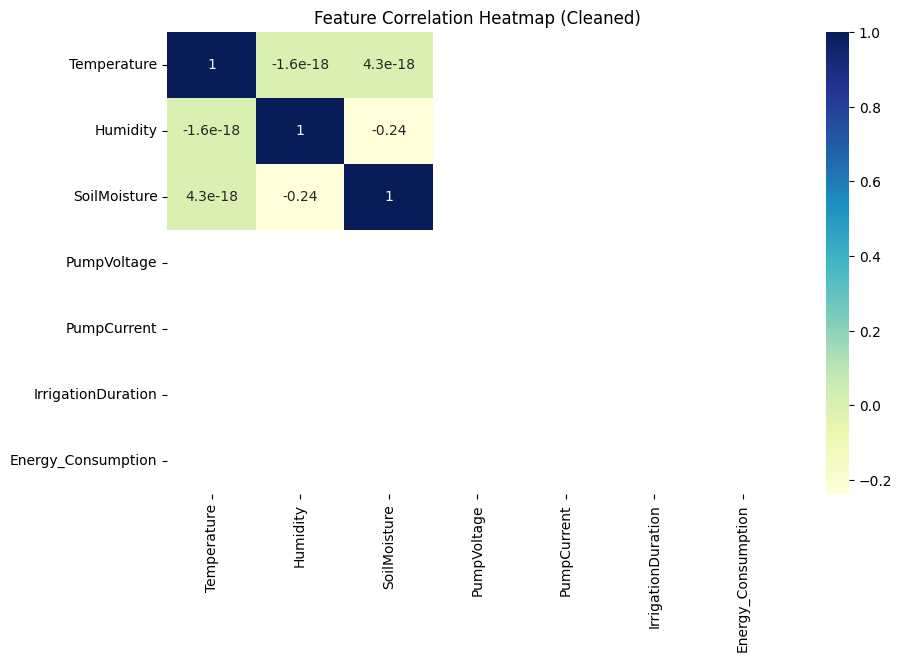

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap (Cleaned)")
plt.show()


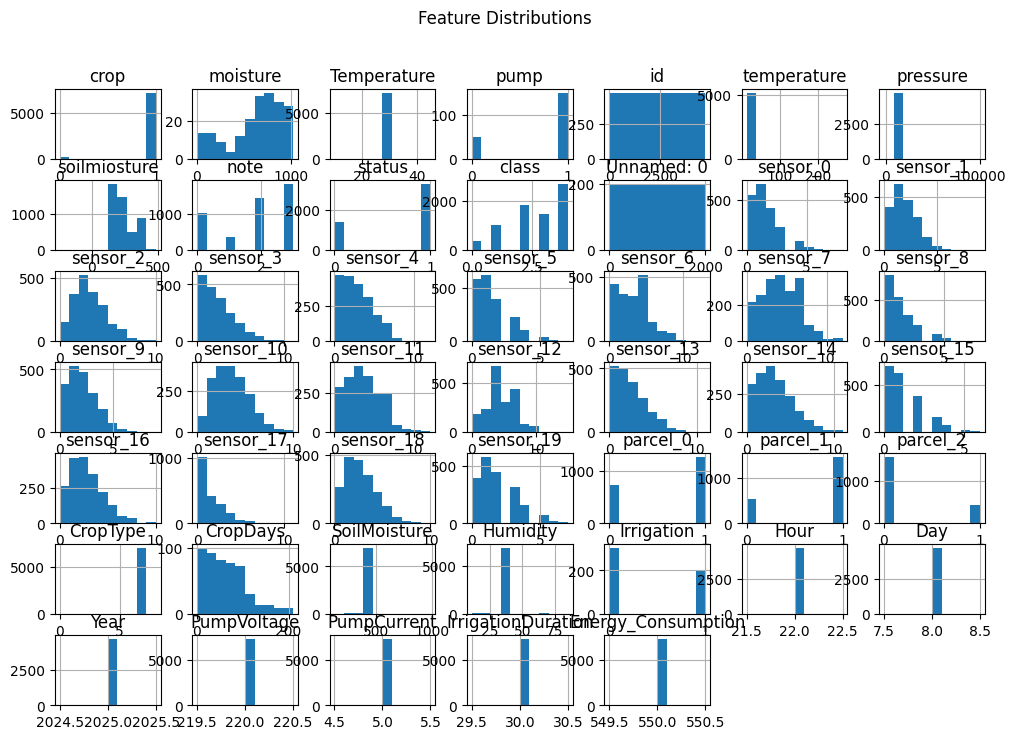

In [13]:
df.hist(figsize=(12, 8))
plt.suptitle("Feature Distributions")
plt.show()

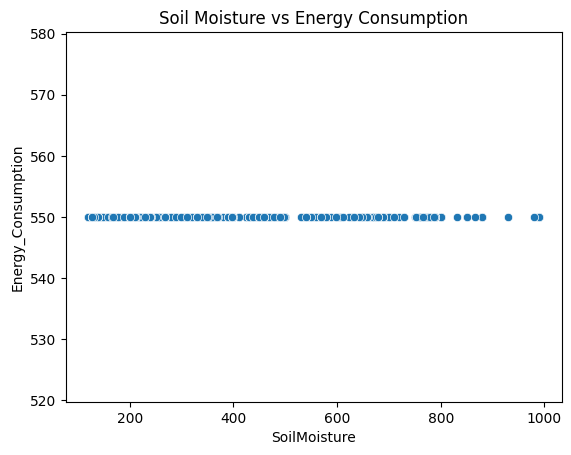

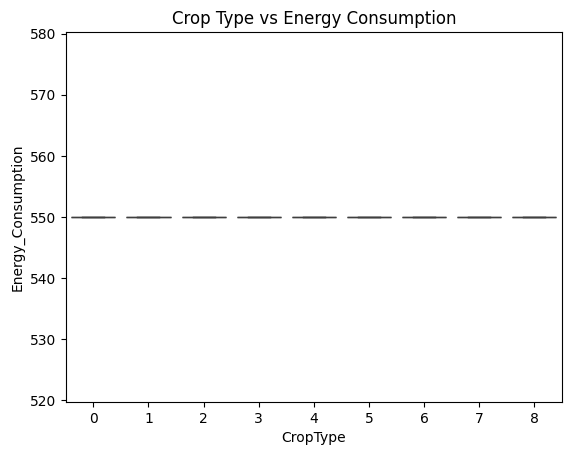

In [16]:
sns.scatterplot(data=df, x='SoilMoisture', y='Energy_Consumption')
plt.title("Soil Moisture vs Energy Consumption")
plt.show()

sns.boxplot(data=df, x='CropType', y='Energy_Consumption')
plt.title("Crop Type vs Energy Consumption")
plt.show()


In [17]:
df = pd.get_dummies(df, columns=['CropType'], drop_first=True)

In [20]:
X = df.drop('Energy_Consumption', axis=1)
y = df['Energy_Consumption']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Columns expected to be numeric
numeric_cols = ['Temperature', 'Humidity', 'SoilMoisture', 
                'PumpVoltage', 'PumpCurrent', 'IrrigationDuration', 'Energy_Consumption']

# Clean and convert
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(r'[^0-9.\-]', '', regex=True)  # remove unwanted characters
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing or invalid numeric values
df = df.dropna(subset=numeric_cols).reset_index(drop=True)


In [27]:
print(df[numeric_cols].dtypes)


Temperature           float64
Humidity              float64
SoilMoisture          float64
PumpVoltage             int64
PumpCurrent             int64
IrrigationDuration      int64
Energy_Consumption    float64
dtype: object


In [28]:
X = df[['Temperature', 'Humidity', 'SoilMoisture', 'PumpVoltage', 'PumpCurrent', 'IrrigationDuration']]
y = df['Energy_Consumption']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Calculate R² and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"✅ Model Evaluation Results:")
print(f"R² Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


✅ Model Evaluation Results:
R² Score: 1.0000
Root Mean Squared Error (RMSE): 0.0000


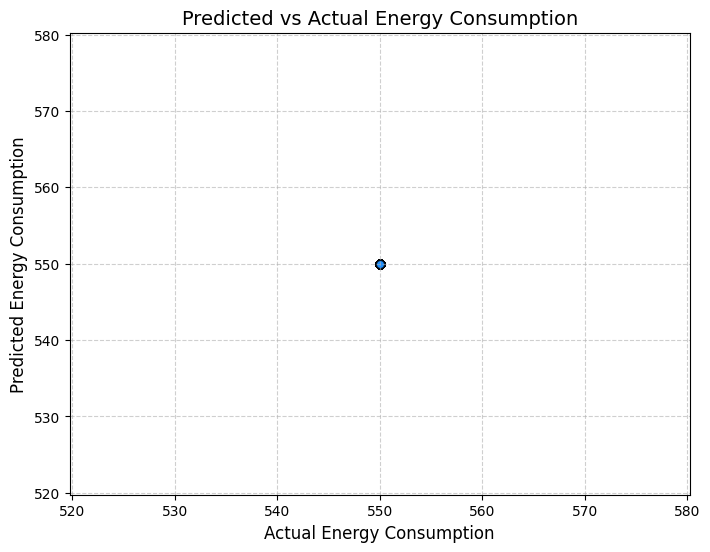

In [34]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Energy Consumption", fontsize=12)
plt.ylabel("Predicted Energy Consumption", fontsize=12)
plt.title("Predicted vs Actual Energy Consumption", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()